<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/Project%232_RF%20(standalone)%20and%20LSTM%20based%20on%20WSNBFSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv("dataset.csv")
dataset.shape
dataset.isnull().sum()

Event             0
Time              0
S_Node            0
Node_id           0
Rest_Energy       0
Trace_Level       0
Mac_Type_Pckt     0
Source_IP_Port    0
Des_IP_Port       0
Packet_Size       0
TTL               0
Hop_Count         0
Broadcast_ID      0
Dest_Node_Num     0
Dest_Seq_Num      0
Src_Node_ID       0
Src_Seq_Num       0
Class             0
dtype: int64

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312106 entries, 0 to 312105
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Event           312106 non-null  int64  
 1   Time            312106 non-null  float64
 2   S_Node          312106 non-null  int64  
 3   Node_id         312106 non-null  int64  
 4   Rest_Energy     312106 non-null  float64
 5   Trace_Level     312106 non-null  int64  
 6   Mac_Type_Pckt   312106 non-null  int64  
 7   Source_IP_Port  312106 non-null  float64
 8   Des_IP_Port     312106 non-null  float64
 9   Packet_Size     312106 non-null  int64  
 10  TTL             312106 non-null  int64  
 11  Hop_Count       312106 non-null  int64  
 12  Broadcast_ID    312106 non-null  int64  
 13  Dest_Node_Num   312106 non-null  int64  
 14  Dest_Seq_Num    312106 non-null  int64  
 15  Src_Node_ID     312106 non-null  int64  
 16  Src_Seq_Num     312106 non-null  int64  
 17  Class     

In [4]:
dataset["Class"].unique()

array([0, 1, 2, 3])

**Data Balancing**

In [5]:
#Installing imblearn
!pip install -U imbalanced-learn
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# check version number
import imblearn
print(imblearn.__version__)     

0.10.1


In [7]:
# Data preprocessing
y = dataset['Class'].values
X = dataset.drop(['Class'],axis=1)
X=X.values
print(X)
print(y)

[[1.00000000e+00 1.00000000e-01 7.90000000e+01 ... 0.00000000e+00
  7.90000000e+01 4.00000000e+00]
 [2.00000000e+00 1.00963167e-01 7.80000000e+01 ... 0.00000000e+00
  7.90000000e+01 4.00000000e+00]
 [2.00000000e+00 1.00963500e-01 7.60000000e+01 ... 0.00000000e+00
  7.90000000e+01 4.00000000e+00]
 ...
 [4.00000000e+00 6.57891729e+02 1.40000000e+02 ... 1.60000000e+01
  1.40000000e+02 7.60000000e+01]
 [4.00000000e+00 6.58574656e+02 1.40000000e+02 ... 1.60000000e+01
  1.40000000e+02 8.00000000e+01]
 [4.00000000e+00 6.79054956e+02 1.40000000e+02 ... 1.60000000e+01
  1.40000000e+02 9.00000000e+01]]
[0 0 0 ... 1 1 1]


In [8]:
import collections as c
counter = c.Counter(y)
print(counter)

Counter({0: 262851, 3: 29844, 1: 11766, 2: 7645})


In [9]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
counter = c.Counter(y)
print(counter)

Counter({0: 262851, 1: 262851, 2: 262851, 3: 262851})


**Data Preprocessing for Train and Testing**

In [10]:
from sklearn.model_selection import train_test_split    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

**Random Forest (RF) for 4 class based on WSNBFSF dataset**

In [11]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=30, max_depth=9)
rf.fit(X_train, y_train)
y_test_prediction = rf.predict(X_test)

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
def conf_mat(d1,d2):
  cm = confusion_matrix(d1, d2)
  plt.figure(figsize=(6,5.5))
  ax = sns.heatmap(cm,  fmt='2', annot=True, cmap='GnBu')
  sns.set(font_scale=1)
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values\n');
  ax.xaxis.set_ticklabels(['Normal','Flooding','Blackhole','Forwarding'])
  ax.yaxis.set_ticklabels(['Normal','Flooding','Blackhole','Forwarding'])
  plt.tight_layout()
  # plt.savefig("F1.eps", format = 'eps')
  plt.show()

# Confusion matrix
cm = confusion_matrix(y_test, y_test_prediction)
print("Confusion Matrix:")
print(cm)

# Classification report
cr = classification_report(y_test, y_test_prediction)
print("Classification Report:")
print(cr)

Confusion Matrix:
[[47062  3968  1470     0]
 [    9 51190     0  1355]
 [  217     8 51255  1065]
 [    0   250   215 52217]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.94     52500
           1       0.92      0.97      0.95     52554
           2       0.97      0.98      0.97     52545
           3       0.96      0.99      0.97     52682

    accuracy                           0.96    210281
   macro avg       0.96      0.96      0.96    210281
weighted avg       0.96      0.96      0.96    210281



Confusion Matrix of Random Forest (RF)


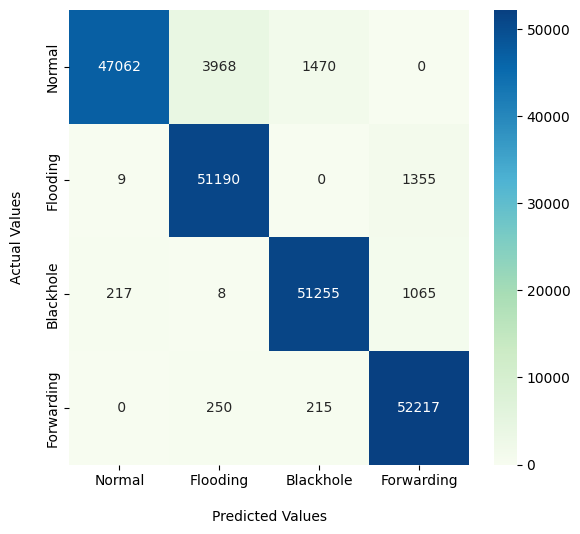

In [13]:
print("Confusion Matrix of Random Forest (RF)") 
conf_mat(y_test, y_test_prediction)

In [14]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, precision_score, recall_score, f1_score
def performance(model,y1, y2):
  print("Model Name is :",model)
  acc=(metrics.accuracy_score(y1, y2,sample_weight=None)*100)
  print("Accuracy :",acc)
  pre=(precision_score(y1, y2, average='weighted', sample_weight=None)*100)
  print("Precision :",pre)
  rec=(recall_score(y1,y2,average='weighted',sample_weight=None)*100)
  print("Recall :",rec)
  f1=(f1_score(y1,y2, average='weighted', sample_weight=None))
  print("F1-Score :",f1) 

In [15]:
performance("Random Forest (RF)",y_test, y_test_prediction)

Model Name is : Random Forest (RF)
Accuracy : 95.93068322863216
Precision : 96.06978724001065
Recall : 95.93068322863216
F1-Score : 0.9591071869360575


In [16]:
# Confusion matrix
cm = confusion_matrix(y_test, y_test_prediction)
print("Confusion Matrix:")
print(cm)

# Classification report
cr = classification_report(y_test, y_test_prediction)
print("Classification Report:")
print(cr)

Confusion Matrix:
[[47062  3968  1470     0]
 [    9 51190     0  1355]
 [  217     8 51255  1065]
 [    0   250   215 52217]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.90      0.94     52500
           1       0.92      0.97      0.95     52554
           2       0.97      0.98      0.97     52545
           3       0.96      0.99      0.97     52682

    accuracy                           0.96    210281
   macro avg       0.96      0.96      0.96    210281
weighted avg       0.96      0.96      0.96    210281



**Long short-term memory (LSTM) for 4 class based on WSNBFSF dataset**

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [18]:
# Encode class labels
le = LabelEncoder()
dataset['Class'] = le.fit_transform(dataset['Class'])
num_classes = len(le.classes_)

# Split dataset into features and target
X = dataset.drop('Class', axis=1).values
y = to_categorical(dataset['Class'].values, num_classes=num_classes)

from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [19]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Reshape input data for LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Define LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(1, X_train.shape[2]), return_sequences=True))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test set
score = model.evaluate(X_test, y_test, batch_size=64)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

# Make predictions with the model
predicted_classes = np.argmax(model.predict(X_test), axis=-1)

# Decode class labels
predicted_classes = le.inverse_transform(predicted_classes)

# Confusion matrix
cm = confusion_matrix(y_test.argmax(axis=1), predicted_classes)
print("Confusion Matrix:")
print(cm)

# Classification report
cr = classification_report(y_test.argmax(axis=1), predicted_classes)
print("Classification Report:")
print(cr)

Epoch 1/15
26286/26286 [==============================] - 140s 5ms/step - loss: 0.4278 - accuracy: 0.8277 - val_loss: 0.3939 - val_accuracy: 0.8494
Epoch 2/15
26286/26286 [==============================] - 125s 5ms/step - loss: 0.3390 - accuracy: 0.8641 - val_loss: 0.3398 - val_accuracy: 0.8504
Epoch 3/15
26286/26286 [==============================] - 134s 5ms/step - loss: 0.3208 - accuracy: 0.8705 - val_loss: 0.3049 - val_accuracy: 0.8780
Epoch 4/15
26286/26286 [==============================] - 123s 5ms/step - loss: 0.3115 - accuracy: 0.8734 - val_loss: 0.3036 - val_accuracy: 0.8838
Epoch 5/15
26286/26286 [==============================] - 131s 5ms/step - loss: 0.3097 - accuracy: 0.8739 - val_loss: 0.3215 - val_accuracy: 0.8613
Epoch 6/15
26286/26286 [==============================] - 136s 5ms/step - loss: 0.2948 - accuracy: 0.8793 - val_loss: 0.2879 - val_accuracy: 0.8785
Epoch 7/15
26286/26286 [==============================] - 126s 5ms/step - loss: 0.2774 - accuracy: 0.8853 - val_

Confusion Matrix of Long short-term memory (LSTM)


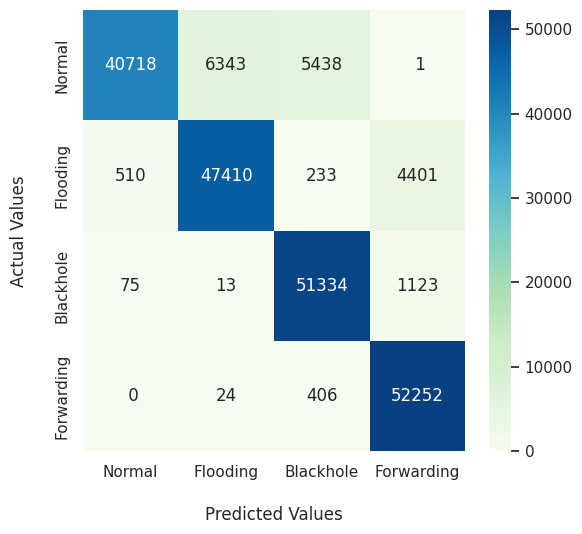

In [21]:
print("Confusion Matrix of Long short-term memory (LSTM)") 
conf_mat(y_test.argmax(axis=1), predicted_classes)